In [17]:
#required libraries.
import pandas as pd #data manipualtion and analysing (DataFrame)
import matplotlib.pyplot as plt  #Creating statc visualiztion 
import seaborn as sns  # improve static visulisation
import numpy as np #numeric operation
import plotly.express as px #interactive visualizations, like scatter plots, bar charts.


# sklearn's TfidfVectorizer converts text into TF-IDF features for text analysis.
# CountVectorizer converts text into a matrix of token counts.

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier  #(Multi-Layer Perceptron) is a neural network-based model used for classification.
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,GRU,LSTM,Bidirectional,SimpleRNN
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("Phishing_Email.csv")

df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [20]:
df.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [21]:
print(df.columns)



Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')


In [22]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)

In [11]:
#shape of data set
print("Dimension of the row data:",df.shape)

Dimension of the row data: (18634, 3)


In [24]:
# Create the bar chart
bar = px.bar(df['Email Type'].value_counts(), x=df['Email Type'].value_counts().index, y=df['Email Type'].value_counts().values,
             color=['green', 'red'], labels={'x': 'Category Safe Email and Phishing Email', 'y': 'Count of Emails'},
             title="Categorical Distribution")

# Show the plot
bar.show()

In [25]:
# Create the pie chart
fig_pie = px.pie(df['Email Type'].value_counts(), names=df['Email Type'].value_counts().index,
                 values=df['Email Type'].value_counts().values, title="Category Safe Email and Phishing Email")

# Show the pie chart
fig_pie.show()

Preprocessing

In [14]:
#encoding 
le = LabelEncoder()

df["Email Type"] = le.fit_transform(df["Email Type"])

In [15]:
df['Email Type'].value_counts()

Email Type
1    11322
0     7312
Name: count, dtype: int64

In [28]:
#Remove hyperlinks, punctuations, extra space
import re

def preprocess_txt(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply the preprocess_text function to the specified column in the DataFrame
df["Cleaned Text"] =df["Email Text"].apply(preprocess_txt)

In [29]:
df.head()

,Email Text,Email Type,Cleaned Text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,re 6 1100 disc uniformitarianism re 1086 sex l...
1,the other side of * galicismos * * galicismo *...,Safe Email,the other side of galicismos galicismo is a sp...
2,re : equistar deal tickets are you still avail...,Safe Email,re equistar deal tickets are you still availab...
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,hello i am your hot lil horny toy i am the one...
4,software at incredibly low prices ( 86 % lower...,Phishing Email,software at incredibly low prices 86 lower dra...


In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


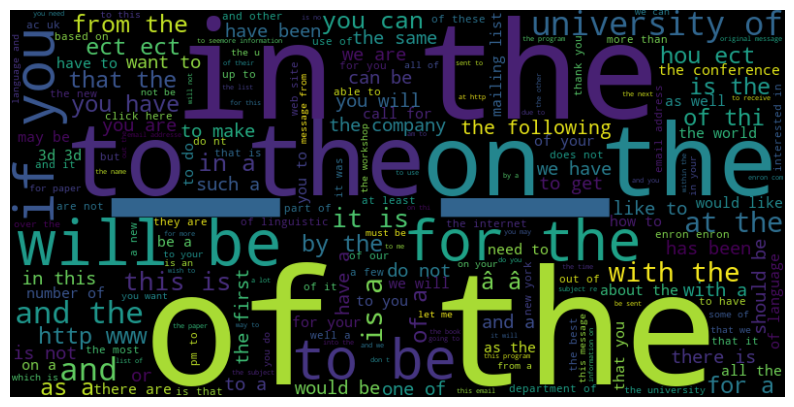

In [32]:
from wordcloud import WordCloud

#combine all rows into a single string
all_mails = " ".join(df['Cleaned Text'])

#create a wordcloud object
word_cloud = WordCloud(stopwords="english",width=800,height=400,background_color='black').generate(all_mails)

plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

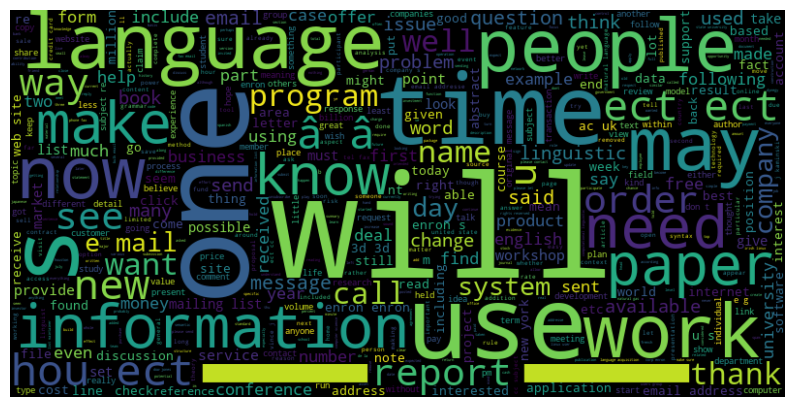

In [33]:
#combine all rows into a single string
all_mails = " ".join(df['Cleaned Text'])

#create a wordcloud object
word_cloud = WordCloud(width=800,height=400,background_color='black',max_words=10000).generate(all_mails)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
#Converting text into vector
tf = TfidfVectorizer(stop_words="english",max_features=10000) #dimension reduction

feature_x = tf.fit_transform(df["Email Text"]).toarray()

In [36]:
# convert the label into numpy array
y_tf = np.array(df['Email Type'])

In [37]:
df.head()

,Email Text,Email Type,Cleaned Text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,re 6 1100 disc uniformitarianism re 1086 sex l...
1,the other side of * galicismos * * galicismo *...,Safe Email,the other side of galicismos galicismo is a sp...
2,re : equistar deal tickets are you still avail...,Safe Email,re equistar deal tickets are you still availab...
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,hello i am your hot lil horny toy i am the one...
4,software at incredibly low prices ( 86 % lower...,Phishing Email,software at incredibly low prices 86 lower dra...


In [38]:
#Splitting into train and test
x_train,x_test,y_train,y_test = train_test_split(feature_x,y_tf,train_size=0.8,random_state=0)

In [ ]:
#Applying different algorithm

In [39]:
#Naive Bayes
#naive bayes works with condtional probability
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

accuracy from native bayes: 97.49 %
f1 score from naive bayes : 96.72 %
classification report     :

                 precision    recall  f1-score   support

Phishing Email       0.97      0.96      0.97      1351
    Safe Email       0.98      0.98      0.98      2157

      accuracy                           0.97      3508
     macro avg       0.97      0.97      0.97      3508
  weighted avg       0.97      0.97      0.97      3508



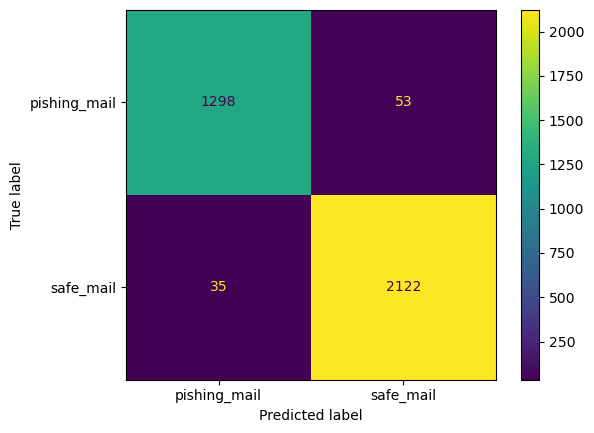

In [41]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
pred_nav = nb.predict(x_test)

# Checking the performance

print(f"accuracy from native bayes: {accuracy_score(y_test,pred_nav)*100:.2f} %")
print(f"f1 score from naive bayes : {f1_score(y_test, pred_nav, pos_label='Phishing Email') * 100:.2f} %")
print("classification report     :\n\n",classification_report(y_test,pred_nav))

#confusion matrix
clf_nav = confusion_matrix(y_test,pred_nav)
cx_ = ConfusionMatrixDisplay(clf_nav,display_labels=['pishing_mail','safe_mail']).plot()
plt.show()


accuracy from logistic regression:98.03 %
f1 score from logistic regression:  96.72 %
classification report : 
                 precision    recall  f1-score   support

Phishing Email       0.98      0.96      0.97      1351
    Safe Email       0.98      0.99      0.98      2157

      accuracy                           0.98      3508
     macro avg       0.98      0.98      0.98      3508
  weighted avg       0.98      0.98      0.98      3508



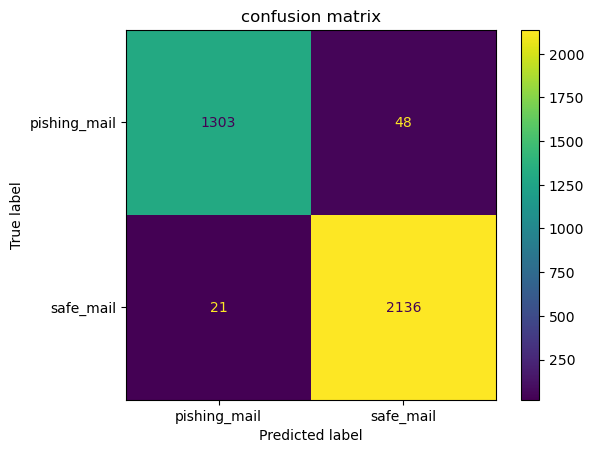

In [43]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

# prediction
pred_lg = lg.predict(x_test)
# performance
print("")
print(f"accuracy from logistic regression:{accuracy_score(y_test,pred_lg)*100:.2f} %")
print(f"f1 score from logistic regression:  {f1_score(y_test, pred_nav, pos_label='Phishing Email') * 100:.2f} %")
print("classification report : \n",classification_report(y_test,pred_lg))

clf_lg = confusion_matrix(y_test,pred_lg)
cx_ = ConfusionMatrixDisplay(clf_lg,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

accuracy from logistic regression:98.06 %
f1 score from logistic regression: 96.72 %
classification report : 
                 precision    recall  f1-score   support

Phishing Email       0.99      0.96      0.97      1351
    Safe Email       0.98      0.99      0.98      2157

      accuracy                           0.98      3508
     macro avg       0.98      0.98      0.98      3508
  weighted avg       0.98      0.98      0.98      3508



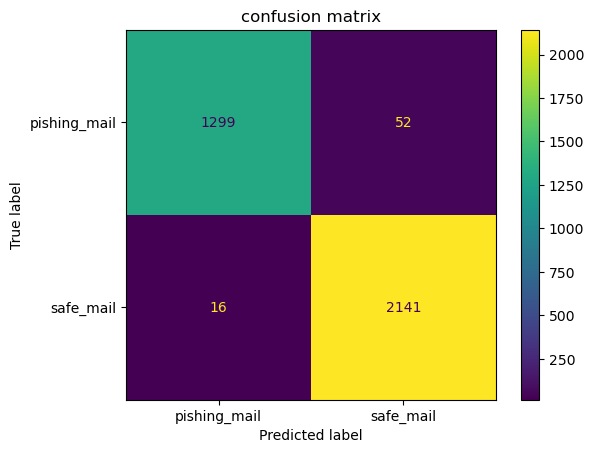

In [44]:
from sklearn.linear_model import SGDClassifier

# passing object
sgd = SGDClassifier()
sgd.fit(x_train,y_train)

# prediction
pred_sgd = sgd.predict(x_test)
# performance
print(f"accuracy from logistic regression:{accuracy_score(y_test,pred_sgd)*100:.2f} %")
print(f"f1 score from logistic regression: {f1_score(y_test, pred_nav, pos_label='Phishing Email') * 100:.2f} %")
print("classification report : \n",classification_report(y_test,pred_sgd))

clf_sgd = confusion_matrix(y_test,pred_sgd)
cx_ = ConfusionMatrixDisplay(clf_sgd,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

accuracy from XGB: 97.35 %
f1 score from XGB: 97.83 %
classification report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.99      0.97      0.98      2157

    accuracy                           0.97      3508
   macro avg       0.97      0.97      0.97      3508
weighted avg       0.97      0.97      0.97      3508



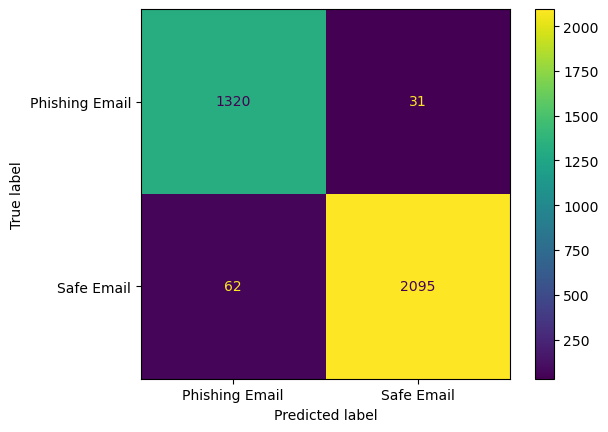

In [48]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_train and y_test are your labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Applying boosting algorithm
xgb = XGBClassifier()
xgb.fit(x_train, y_train_encoded)

# Prediction
pred_xgb = xgb.predict(x_test)

# Performance
print(f"accuracy from XGB: {accuracy_score(y_test_encoded, pred_xgb) * 100:.2f} %")
print(f"f1 score from XGB: {f1_score(y_test_encoded, pred_xgb) * 100:.2f} %")
print("classification report : \n", classification_report(y_test_encoded, pred_xgb))

# Confusion matrix
clf_xgb = confusion_matrix(y_test_encoded, pred_xgb)
cx_ = ConfusionMatrixDisplay(clf_xgb, display_labels=label_encoder.classes_).plot()
plt.show()


accuracy from Decision Tree:93.39 %
f1 score from Decision Tree: 96.72 %
classification report : 
                 precision    recall  f1-score   support

Phishing Email       0.91      0.92      0.91      1351
    Safe Email       0.95      0.94      0.95      2157

      accuracy                           0.93      3508
     macro avg       0.93      0.93      0.93      3508
  weighted avg       0.93      0.93      0.93      3508



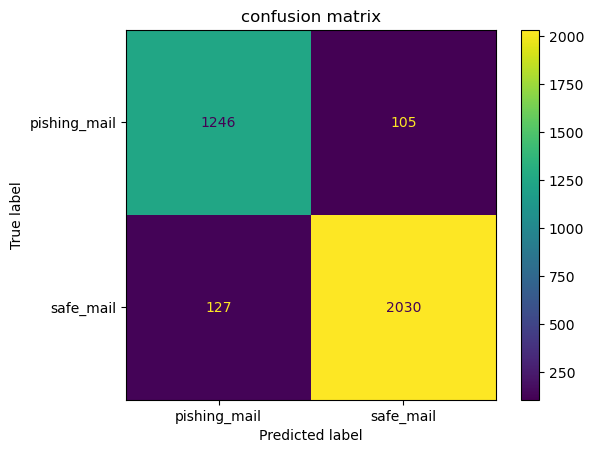

In [50]:
dtr = DecisionTreeClassifier() #passing object
dtr.fit(x_train,y_train)

#prediction
pred_dtr = dtr.predict(x_test)

#performance
print(f"accuracy from Decision Tree:{accuracy_score(y_test,pred_dtr)*100:.2f} %")
print(f"f1 score from Decision Tree: {f1_score(y_test, pred_nav, pos_label='Phishing Email') * 100:.2f} %")
print("classification report : \n",classification_report(y_test,pred_dtr))

#confusion matrix
clf_dtr = confusion_matrix(y_test,pred_dtr)
cx_ = ConfusionMatrixDisplay(clf_dtr,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

In [52]:
models = ['Naive bayes', 'Logistic Regression', 'SGD Classifier', 'XGBoost', 'Decision Tree']
accuracies = [97.49, 98.03, 98.53, 97.35, 93.24]

# Create the bar chart
fig = px.bar(x=models, y=accuracies, labels={'x': 'Models(ALgorithams)', 'y': 'Accuracy'},
             title="Performance of the models", text=accuracies)

# Customize the layout (optional)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside', marker_color='blue')

# Show the plot
fig.show()

In [53]:
max_len = 150

tk = Tokenizer()

# Process the text

tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences,padding='post', maxlen=max_len)

In [54]:
len(vector)

17538

In [55]:
x = np.array(vector)
y = np.array(df["Email Type"])

In [56]:
#Split the dataset into train and test set

x_train, x_test, y_train, y_test = train_test_split(vector,df['Email Type'], test_size=0.2, random_state =0)

Apply Deep Learning Models

In [57]:
#Simple RNN
model_smp = Sequential() # Sequential() API
model_smp.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model_smp.add(SimpleRNN(units=100))
model_smp.add(Dropout(0.45))
model_smp .add(Dense(1, activation='sigmoid'))

In [58]:
model_smp.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [59]:
model_smp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [65]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train and y_test are your labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now fit the model using encoded labels
historical_smp = model_smp.fit(x_train, y_train_encoded, epochs=7, batch_size=16, validation_data=(x_test, y_test_encoded))


Epoch 1/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 84s 94ms/step - accuracy: 0.6229 - loss: 0.6473 - val_accuracy: 0.7118 - val_loss: 0.5482
Epoch 2/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.7049 - loss: 0.5609 - val_accuracy: 0.6924 - val_loss: 0.5391
Epoch 3/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 76s 87ms/step - accuracy: 0.7187 - loss: 0.5122 - val_accuracy: 0.7956 - val_loss: 0.4747
Epoch 4/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 79s 90ms/step - accuracy: 0.8196 - loss: 0.3785 - val_accuracy: 0.7976 - val_loss: 0.4508
Epoch 5/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 79s 86ms/step - accuracy: 0.7938 - loss: 0.3956 - val_accuracy: 0.6956 - val_loss: 0.5526
Epoch 6/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 77s 80ms/step - accuracy: 0.7595 - loss: 0.3937 - val_accuracy: 0.6973 - val_loss: 0.5534
Epoch 7/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 75s 85ms/step - accuracy: 0.7858 - loss: 0.3636 - val_accuracy: 0.7175 - val_loss: 0.5045


Text(0, 0.5, 'Loss')

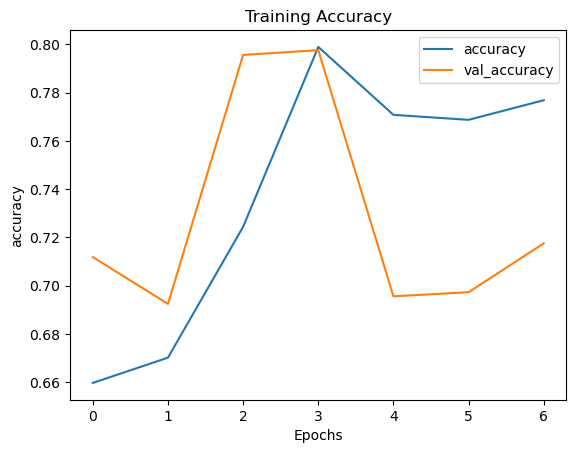

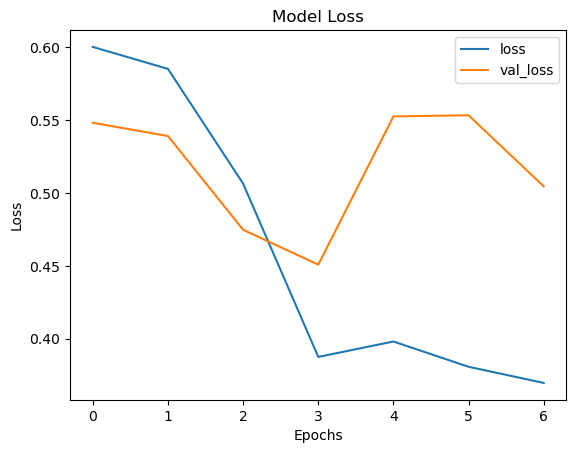

In [66]:
import matplotlib.pyplot as plt
pd.DataFrame(historical_smp.history)

pd.DataFrame(historical_smp.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical_smp.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


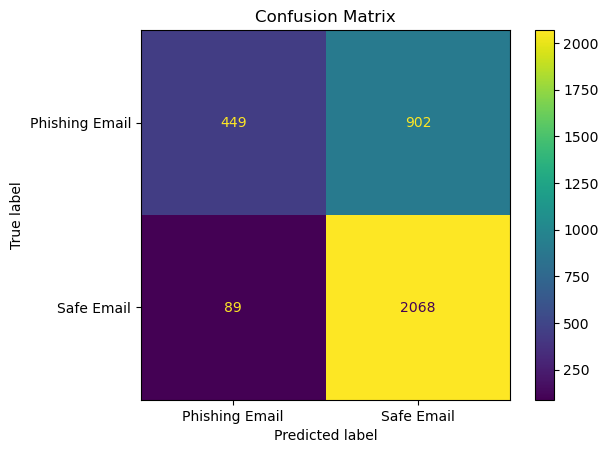

In [68]:
y_pred_prob_smp = model_smp.predict(x_test)
y_pred_smp = (y_pred_prob_smp > 0.5).astype(int)

# Convert numerical predictions back to original string labels
y_pred_smp_labels = label_encoder.inverse_transform(y_pred_smp.flatten())

# Create the confusion matrix
cnf_smp = confusion_matrix(y_test, y_pred_smp_labels, labels=label_encoder.classes_)
ax_smp = ConfusionMatrixDisplay(confusion_matrix=cnf_smp, display_labels=label_encoder.classes_).plot()
plt.title("Confusion Matrix")
plt.show()

In [69]:
#LSTM Architecture
model = Sequential() # Sequential() API
model.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model.add(LSTM(units=100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [70]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [77]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train and y_test are your original labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode training labels
y_test_encoded = label_encoder.transform(y_test)        # Encode test labels

# Fit the model using encoded labels
historical = model.fit(x_train, y_train_encoded, epochs=5, batch_size=16, validation_data=(x_test, y_test_encoded))


Epoch 1/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 101s 114ms/step - accuracy: 0.6846 - loss: 0.5943 - val_accuracy: 0.9433 - val_loss: 0.2391
Epoch 2/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 100s 114ms/step - accuracy: 0.9196 - loss: 0.2601 - val_accuracy: 0.9612 - val_loss: 0.1440
Epoch 3/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 149s 122ms/step - accuracy: 0.9672 - loss: 0.1285 - val_accuracy: 0.9629 - val_loss: 0.1391
Epoch 4/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 96s 109ms/step - accuracy: 0.9736 - loss: 0.1061 - val_accuracy: 0.9658 - val_loss: 0.1310
Epoch 5/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 91s 104ms/step - accuracy: 0.9563 - loss: 0.1694 - val_accuracy: 0.9698 - val_loss: 0.1244


In [79]:
# Evaluate the model using encoded test labels
results = model.evaluate(x_test, y_test_encoded)
loss = results[0]  # Extract the loss from the results
accuracy = results[1]  # Extract the accuracy from the results

print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy * 100:.2f}%")

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9699 - loss: 0.1234
Model Loss: 0.1243726909160614
Model Accuracy: 96.98%


Text(0, 0.5, 'Loss')

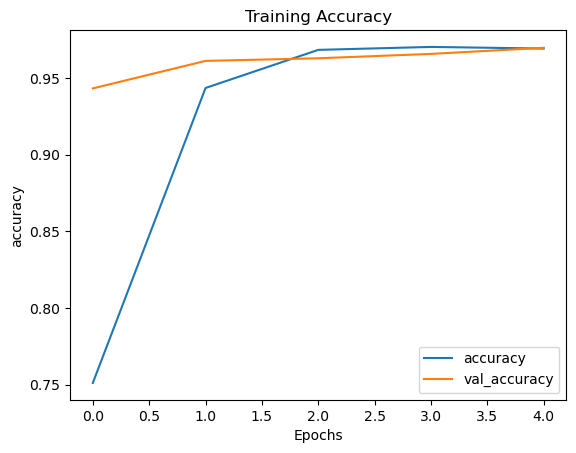

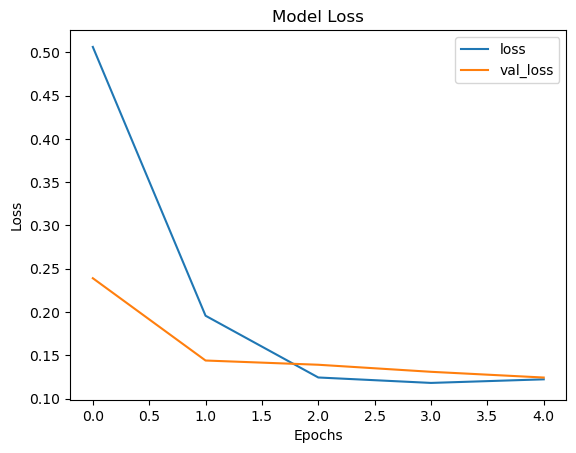

In [80]:
pd.DataFrame(historical.history)

pd.DataFrame(historical.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [82]:
cnf = confusion_matrix(y_test_encoded, y_pred)  # Use encoded test labels
ax = ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=label_encoder.classes_)
ax.plot()
plt.title("Confusion Matrix")
plt.show()

NameError: name 'y_pred' is not defined

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 67s 72ms/step - accuracy: 0.8351 - loss: 0.3175 - val_accuracy: 0.9832 - val_loss: 0.0529
Epoch 2/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 61s 69ms/step - accuracy: 0.9942 - loss: 0.0184 - val_accuracy: 0.9832 - val_loss: 0.0541
Epoch 3/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 58s 66ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9849 - val_loss: 0.0616
Epoch 4/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 61s 70ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9835 - val_loss: 0.0714
Epoch 5/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 85s 73ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9826 - val_loss: 0.0796
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9826 - loss: 0.0680
Model Loss: 0.07955397665500641
Model Accuracy: 98.26111793518066
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


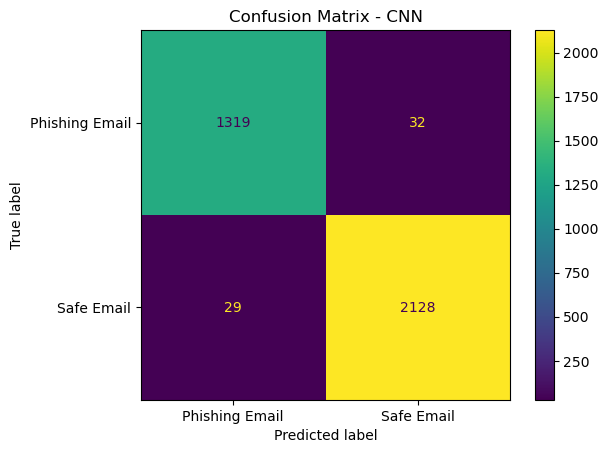

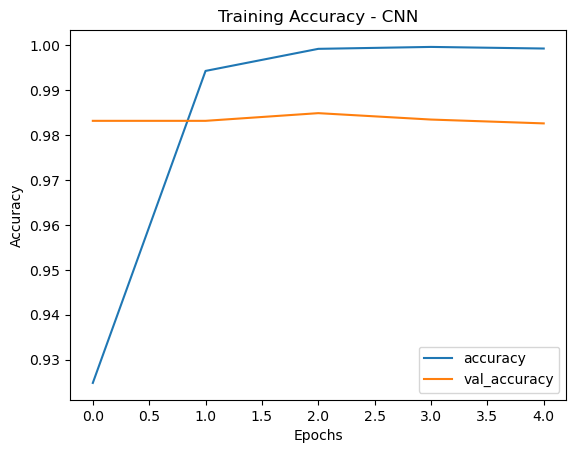

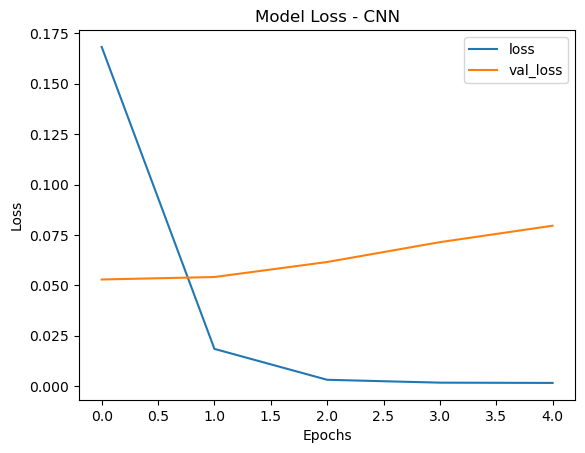

In [84]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_train and y_test are your original labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode training labels
y_test_encoded = label_encoder.transform(y_test)        # Encode test labels

# CNN Architecture
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=len(tk.word_index) + 1, output_dim=50, input_length=150))
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile model
model_cnn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Model Summary
model_cnn.summary()

# Train model
history_cnn = model_cnn.fit(x_train, y_train_encoded, epochs=5, batch_size=16, validation_data=(x_test, y_test_encoded))

# Evaluate model
results_cnn = model_cnn.evaluate(x_test, y_test_encoded)
print(f"Model Loss: {results_cnn[0]}")
print(f"Model Accuracy: {results_cnn[1] * 100}")

# Confusion Matrix
y_pred_prob_cnn = model_cnn.predict(x_test)
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int)

cnf_cnn = confusion_matrix(y_test_encoded, y_pred_cnn)
ax_cnn = ConfusionMatrixDisplay(confusion_matrix=cnf_cnn, display_labels=label_encoder.classes_)
ax_cnn.plot()
plt.title("Confusion Matrix - CNN")
plt.show()

# Accuracy Plot
pd.DataFrame(history_cnn.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy - CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Loss Plot
pd.DataFrame(history_cnn.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss - CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
